In [30]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from sklearn.cluster import KMeans
from util_func import *

if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()


True

In [31]:
image = cv.imread('images/zebra.jfif')

# Convert the image to BGR, HSV, and LAB color spaces
bgr_image = image.copy()
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
lab_image = cv.cvtColor(image, cv.COLOR_BGR2LAB)

In [38]:
# Calculate within-cluster sum of squares
def calculate_wcss(data, max_k):
    wcss = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Set n_init=10 to suppress the warning (10 is default)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss


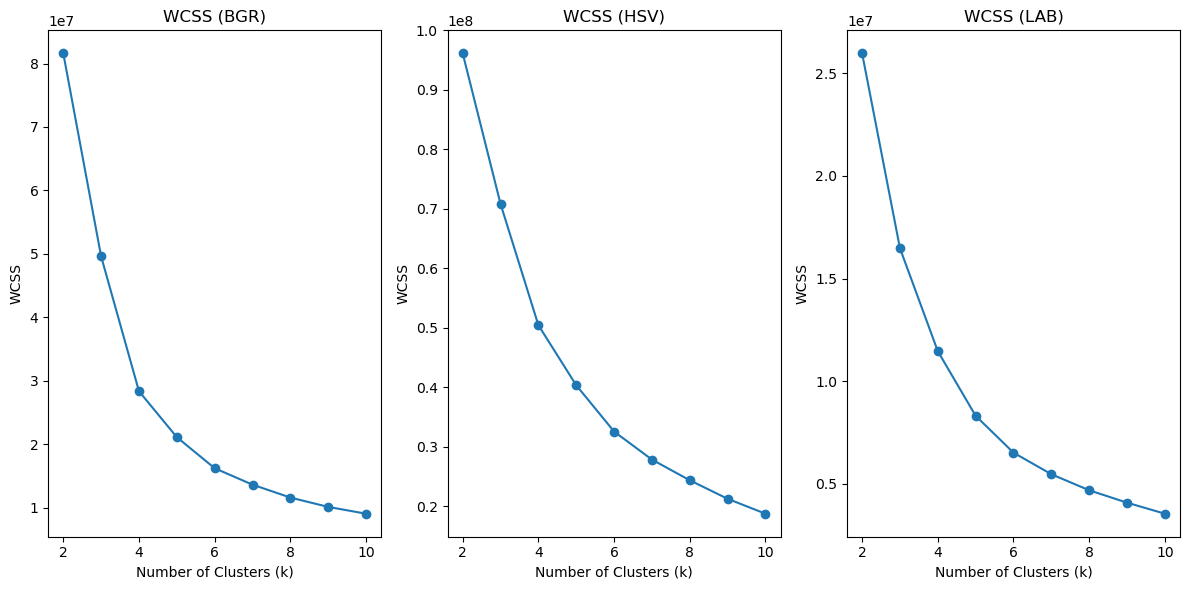

In [39]:
# Calculate WCSS for each color space
max_k = 10
wcss_bgr = calculate_wcss(bgr_image.reshape(-1, 3), max_k)
wcss_hsv = calculate_wcss(hsv_image.reshape(-1, 3), max_k)
wcss_lab = calculate_wcss(lab_image.reshape(-1, 3), max_k)

# Plot the WCSS values for different values of k
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.plot(range(2, max_k + 1), wcss_bgr, marker='o')
plt.title('WCSS (BGR)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')

plt.subplot(132)
plt.plot(range(2, max_k + 1), wcss_hsv, marker='o')
plt.title('WCSS (HSV)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')

plt.subplot(133)
plt.plot(range(2, max_k + 1), wcss_lab, marker='o')
plt.title('WCSS (LAB)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')

plt.tight_layout()
plt.show()

In [40]:
# apply k-means clusterinf on image
def k_means_clust(img, K, max_iter=10, eps=1.0, attempts=10, flag=cv.KMEANS_PP_CENTERS):
    """Args:
    img: 3 channel color image
    K: user defined num of cluster
    By default, max_iter = 10, eps = 1.0, attempts = 10, k-means++"""
    
    # reshape and cast
    img = img.reshape((-1, 3))
    img = np.float32(img)
    criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_MAX_ITER, max_iter, eps)
    return cv.kmeans(img, K, None, criteria, attempts, flag)
    

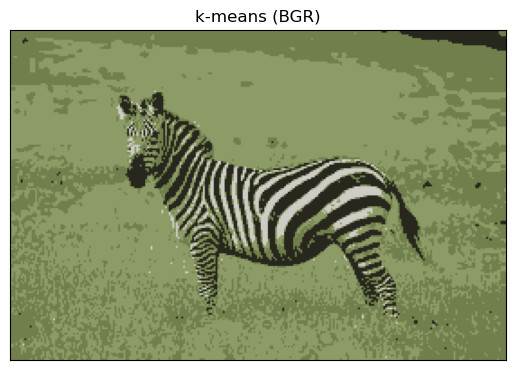

In [41]:
#BGR
ret, label, center = k_means_clust(bgr_image, 4)

center = np.uint8(center)
res = center[label.ravel()]
quant = res.reshape(bgr_image.shape)

quant_rgb = cv.cvtColor(quant, cv.COLOR_BGR2RGB)

plt_img(quant_rgb, "k-means (BGR)")

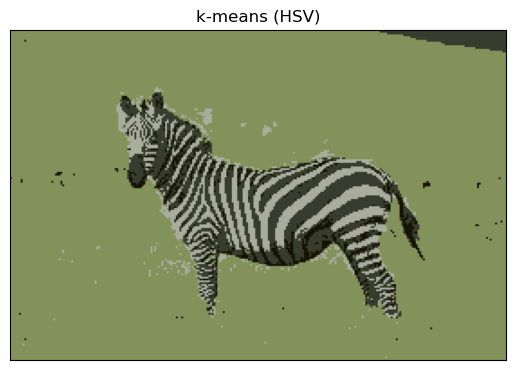

In [42]:
#HSV
ret, label, center = k_means_clust(hsv_image, 4)

center = np.uint8(center)
res = center[label.ravel()]
quant = res.reshape(hsv_image.shape)

quant_rgb = cv.cvtColor(quant, cv.COLOR_HSV2RGB)

plt_img(quant_rgb, "k-means (HSV)")

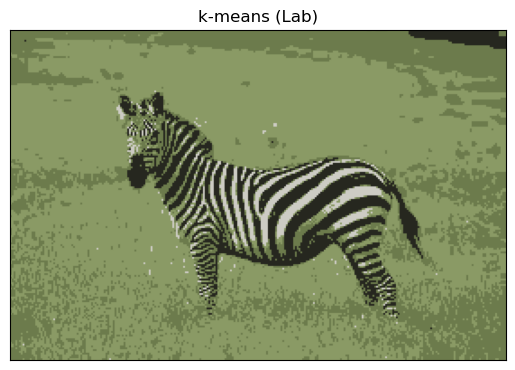

In [43]:
#Lab
ret, label, center = k_means_clust(lab_image, 4)

center = np.uint8(center)
res = center[label.ravel()]
quant = res.reshape(lab_image.shape)

quant_rgb = cv.cvtColor(quant, cv.COLOR_Lab2RGB)

plt_img(quant_rgb, "k-means (Lab)")

BGR: Clusters might be sensitive to lighting variations and might not always capture the desired color patterns effectively.
HSV: Clusters might be more robust to lighting variations, and colors within a cluster might have similar perceived color qualities.
Lab: Clusters are likely to capture subtle color differences effectively, leading to more visually coherent segments.
Lab and HSV are more like human perceived colors 
